<h1 style="color:#0c0a0b;background-color:#71b12c;font-size: 5rem; text-align: center;padding:0.5rem;border-radius:5rem;  border-bottom: 1.5rem solid #edf2f8"> 🚀 Landsat Collections Documentation 🚀  </h1>

## Introduction
This file contains information about the different collections of Landsat products provided by the USGS (United States Geological Survey). For further information visit the S3 documentation at :
```python
https://registry.opendata.aws/usgs-landsat/index.html
```

## 🌌 API and Endpoints 🌌
All collections use a common API based on the STAC standard but access different specific **endpoints** for each collection. For example:

- **Base API or Root**: `https://landsatlook.usgs.gov/stac-server/`.

- To interact with the STAC server methods go to 
```python
https://stac-utils.github.io/stac-server/
```
**Version**: 1.0.0  
**Contact**: [STAC Specification](http://stacspec.org)  
**License**: [Apache License 2.0](http://www.apache.org/licenses/LICENSE-2.0)

---

## 🔌 Endpoints 🔌

### 1. Get Landing Page
**Method**: `GET`  
**Endpoint**: `/`  
**Description**: Provides links to sub-resources and the API definition.  
**Responses**:  
- `200 OK`: Returns the landing page links.  
- `500 Internal Server Error`: Server error.

---

### 2. Get Feature Collections
**Method**: `GET`  
**Endpoint**: `/collections`  
**Description**: Retrieves a list of feature collections in the dataset.  
**Responses**:  
- `200 OK`: Returns the collections metadata.  
- `500 Internal Server Error`: Server error.

---

### 3. Describe Feature Collection by ID
**Method**: `GET`  
**Endpoint**: `/collections/{collectionId}`  
**Description**: Retrieves metadata for a specific feature collection using `collectionId`.  
**Parameters**:
- `collectionId` (path) **required**: Local identifier of a collection.
**Responses**:  
- `200 OK`: Returns the collection metadata.  
- `404 Not Found`: Collection not found.  
- `500 Internal Server Error`: Server error.

---

### 4. Get Features from Collection
**Method**: `GET`  
**Endpoint**: `/collections/{collectionId}/items`  
**Description**: Fetches the features within a collection specified by `collectionId`.  
**Parameters**:
- `collectionId` (path) **required**: Local identifier of the collection.  
- `bbox` (query) **optional**: Bounding box to filter features.  
- `datetime` (query) **optional**: Filter features by date and time.  
- `limit` (query) **optional**: Number of items to return (default: 10, max: 10000).

**Responses**:  
- `200 OK`: Returns the features in the collection.  
- `400 Bad Request`: Invalid parameters.  
- `404 Not Found`: Collection not found.  
- `500 Internal Server Error`: Server error.

---

### 5. Search for Items
**Method**: `GET`  
**Endpoint**: `/search`  
**Description**: Retrieves STAC items using filtering criteria.  
**Parameters**:
- `bbox` (query) **optional**: Bounding box to filter items.  
- `datetime` (query) **optional**: Filter items by date and time.  
- `limit` (query) **optional**: Number of items to return.  
- `ids` (query) **optional**: Array of item IDs to return.  
- `collections` (query) **optional**: Filter by collection IDs.  
- `sortby` (query) **optional**: Sort items by properties.

**Responses**:  
- `200 OK`: Returns the matching items.  
- `500 Internal Server Error`: Server error.

---

### 6. Create New STAC Item
**Method**: `POST`  
**Endpoint**: `/collections/{collectionId}/items`  
**Description**: Adds a new STAC item to the specified collection.  
**Parameters**:
- `collectionId` (path) **required**: Local identifier of the collection.  
**Request Body**:
- STAC Item (GeoJSON format).

**Responses**:  
- `201 Created`: The item was successfully created.  
- `400 Bad Request`: Invalid input.  
- `404 Not Found`: Collection not found.  
- `500 Internal Server Error`: Server error.

---

### 7. Update Existing STAC Item
**Method**: `PUT`  
**Endpoint**: `/collections/{collectionId}/items/{featureId}`  
**Description**: Updates an existing STAC item by replacing its entire definition.  
**Parameters**:
- `collectionId` (path) **required**: Local identifier of the collection.  
- `featureId` (path) **required**: Local identifier of the feature.  

**Request Body**:  
- Updated STAC Item (GeoJSON format).

**Responses**:  
- `204 No Content`: The item was successfully updated.  
- `400 Bad Request`: Invalid input.  
- `404 Not Found`: Feature not found.  
- `500 Internal Server Error`: Server error.

---

### 8. Delete STAC Item
**Method**: `DELETE`  
**Endpoint**: `/collections/{collectionId}/items/{featureId}`  
**Description**: Deletes a specific STAC item by `featureId`.  
**Parameters**:
- `collectionId` (path) **required**: Local identifier of the collection.  
- `featureId` (path) **required**: Local identifier of the feature.

**Responses**:  
- `204 No Content`: The item was successfully deleted.  
- `404 Not Found`: Feature not found.  
- `500 Internal Server Error`: Server error.

---

### 9. Get Conformance Classes
**Method**: `GET`  
**Endpoint**: `/conformance`  
**Description**: Lists all conformance classes supported by the server.  
**Responses**:  
- `200 OK`: Returns the conformance classes.  
- `500 Internal Server Error`: Server error.

---

### 10. Get Feature by ID
**Method**: `GET`  
**Endpoint**: `/collections/{collectionId}/items/{featureId}`  
**Description**: Fetches a specific feature within a collection.  
**Parameters**:
- `collectionId` (path) **required**: Local identifier of the collection.  
- `featureId` (path) **required**: Local identifier of the feature.

**Responses**:  
- `200 OK`: Returns the requested feature.  
- `404 Not Found`: Feature not found.  
- `500 Internal Server Error`: Server error.

## 1️⃣ Collection Structure 1️⃣

### Key Fields
Each collection has a similar structure, composed of the following key fields:

- **id**: Unique identifier of the collection. Example: `"landsat-c2l2-sr"`.
- **type**: The type of resource, which in this case is always `"Collection"`.
- **stac_version**: The version of the STAC standard used. Example: `"1.0.0"`.
- **stac_extensions**: List of STAC extensions used in the collection.
- **title**: The descriptive title of the product. Example: `"Landsat Collection 2 Level-2 UTM Surface Reflectance (SR) Product"`.
- **description**: Detailed description of the product. Example: `"The Landsat Surface Reflectance (SR) product measures the fraction of incoming solar radiation that is reflected from Earth's surface to the Landsat sensor."`.
- **keywords**: Keywords associated with the collection to facilitate search. Example: `["landsat", "surface reflectance"]`.
- **extent**:
  - **spatial**: Spatial extent of the collection (in longitude and latitude coordinates). Example: `[[-180, -90, 180, 90]]`.
  - **temporal**: Temporal interval of the collection data. Example: `["1982-08-22T00:00:00.000Z", null]`.
- **providers**: List of providers that process, produce, or host the data. Example: `"U.S. Geological Survey (USGS) Earth Resources Observation and Science (EROS) Center"`.
- **license**: URL of the data usage policy. Example: `"https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/atoms/files/Landsat_Data_Policy.pdf"`.
- **summaries**: Summary of the platform and other parameters of the collection. Example: `"platform": ["LANDSAT_4", "LANDSAT_5"]`.
- **links**: Links to access the collection's API and its items.
root
    - **root**: Refers to the root endpoint for the API
    - **self**: Referes to its self endpoint like `root/{collection_name}`
    - **items**: Presents the current information for the collection like `{itself_endpoint}/items`

## 2️⃣ Available Collections 2️⃣

The JSON file includes several collections, each with its own ID and description. Some of them are:

1. **`landsat-c2l2-sr`**:
   - **Title**: Landsat Collection 2 Level-2 UTM Surface Reflectance (SR) Product.
   - **Description**: The Landsat Surface Reflectance (SR) product measures the fraction of incoming solar radiation that is reflected from Earth's surface to the Landsat sensor.

2. **`landsat-c2l2-st`**:
   - **Title**: Landsat Collection 2 Level-2 UTM Surface Temperature (ST) Product
   - **Description**: The Landsat Surface Temperature (ST) product represents the temperature of the Earth's surface in Kelvin (K).

3. **`landsat-c2ard-st`**:
   - **Title**: Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Surface Temperature (ST) Product
   - **Description**: The Landsat Surface Temperature (ST) product represents the temperature of the Earth's surface in Kelvin (K).

4. **`landsat-c2l2alb-bt`**:
   - **Title**: Landsat Collection 2 Level-2 Albers Top of Atmosphere Brightness Temperature (BT) Product
   - **Description**: The Landsat Top of Atmosphere Brightness Temperature (BT) product is a top of atmosphere product with radiance calculated 'at-sensor', not atmospherically corrected, and expressed in units of Kelvin.

5. **`landsat-c2l3-fsca`**:
    - **Title**: Landsat Collection 2 Level-3 Fractional Snow Covered Area (fSCA) Product
    - **Description**: The Landsat Fractional Snow Covered Area (fSCA) product contains an acquisition-based per-pixel snow cover fraction, an acquisition-based revised cloud mask for quality assessment, and a product metadata file.

6. **`landsat-c2ard-bt`**:
    - **Title**: Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Top of Atmosphere Brightness Temperature (BT) Product

    - **Description**: The Landsat Top of Atmosphere Brightness Temperature (BT) product is a top of atmosphere product with radiance calculated 'at-sensor', not atmospherically corrected, and expressed in units of Kelvin.

7. **`landsat-c2l1`**:
    - **Title**: Landsat Collection 2 Level-1 Product

    - **Description**: The Landsat Level-1 product is a top of atmosphere product distributed as scaled and calibrated digital numbers.

8. **`landsat-c2l3-ba`**:
    - **Title**: Landsat Collection 2 Level-3 Burned Area (BA) Product
    - **Description**: The Landsat Burned Area (BA) contains two acquisition-based raster data products that represent burn classification and burn probability.

9. **`landsat-c2l2alb-st`**:
    - **Title**: Landsat Collection 2 Level-2 Albers Surface Temperature (ST) Product
    - **Description**: The Landsat Surface Temperature (ST) product represents the temperature of the Earth's surface in Kelvin (K).

10. **`landsat-c2ard-sr`**:
    - **Title**: Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Surface Reflectance (SR) Product
    - **Description**: The Landsat Surface Reflectance (SR) product measures the fraction of incoming solar radiation that is reflected from Earth's surface to the Landsat sensor.

11. **`landsat-c2l2alb-sr`**:
    - **Title**: Landsat Collection 2 Level-2 Albers Surface Reflectance (SR) Product
    - **Description**: The Landsat Surface Reflectance (SR) product measures the fraction of incoming solar radiation that is reflected from Earth's surface to the Landsat sensor.

12. **`landsat-c2l2alb-ta`**:
    - **Title**: Landsat Collection 2 Level-2 Albers Top of Atmosphere (TA) Reflectance Product
    - **Description**: The Landsat Top of Atmosphere (TA) Reflectance product applies per pixel angle band corrections to the Level-1 radiance product.

13. **`landsat-c2l3-dswe`**:
    - **Title**: Landsat Collection 2 Level-3 Dynamic Surface Water Extent (DSWE) Product
    - **Description**: The Landsat Dynamic Surface Water Extent (DSWE) product contains six acquisition-based raster data products pertaining to the existence and condition of surface water.
14. **`landsat-c2ard-ta`**:
    - **Title**: Landsat Collection 2 Analysis Ready Data (ARD) Level-2 UTM Top of Atmosphere (TA) Reflectance Product
    - **Description**: The Landsat Top of Atmosphere (TA) Reflectance product applies per pixel angle band corrections to the Level-1 radiance product.              
    


<h2 style="color:#8A26BD;font-size: 2rem; border-bottom: .5rem solid #71b12c;">  Customizing the environment </h2>

In [1]:
%%time 
!pip install pystac_client folium dask_ml #pycaret[full]

INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.8/149.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
CPU times: user 443 ms, sys: 88 ms, total: 531 ms
Wall time: 21.9 s


Main color Palette: 

Second color Palette: 

Third color Palette: 



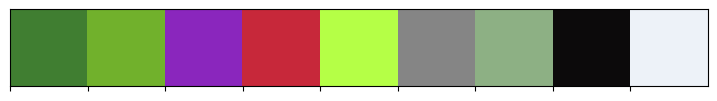

CPU times: user 1.76 s, sys: 224 ms, total: 1.98 s
Wall time: 1.57 s


In [2]:
%%time
import matplotlib.pyplot as plt # Inner method plt
import seaborn as sns 
from matplotlib.colors import ListedColormap


# Custom colors
my_coolors = ["#407e31", "#71b12c", "#8A26BD", "#C7283A","#b5ff46", "#858585","#8db084", "#0c0a0b", "#edf2f8"]

class mainK:
    c = '\033[1m' + '\033[1;38;2;138;38;189m'
    f = '\033[0m'
    
class secK:
    c = '\033[1m' + '\033[1;38;2;181;255;70m'
    f = '\033[0m'  
    
class terK:
    c = '\033[1m' + '\033[1;38;2;199;40;58m'
    f = '\033[0m'      
    

pltKolors = ListedColormap(my_coolors)
sns.palplot(sns.color_palette(my_coolors))



print(mainK.c+"Main color Palette:"+mainK.f,"\n")
print(secK.c+"Second color Palette:"+secK.f,"\n")
print(terK.c+"Third color Palette:"+terK.f,"\n")
plt.show()

In [3]:
%%time
import os
import dask
from dask.distributed import LocalCluster, Client, SSHCluster
import concurrent.futures
import dask.dataframe as dd
import dask.array as da
import traceback


def create_dask_cluster():
    try:
        # Obtiene el número de CPUs disponibles
        num_local_workers = os.cpu_count()
        
        # Crea un clúster local
        local_cluster = LocalCluster(n_workers=num_local_workers)
        
        # Lista de direcciones IP de las máquinas remotas
        remote_addresses = []  # Deja esta lista vacía si no hay máquinas remotas
        
        # Determina si se deben agregar máquinas remotas
        add_remote_machines = len(remote_addresses) > 0
        
        if add_remote_machines:
            # Crea un clúster SSH para las máquinas remotas
            remote_cluster = SSHCluster(remote_addresses)
            
            # Combina los clústers local y remoto
            combined_cluster = local_cluster + remote_cluster
        else:
            # Solo usa el clúster local
            combined_cluster = local_cluster
        
        # Crea el cliente con el clúster combinado
        client = Client(combined_cluster)
        
        # Muestra el estado actual de Dask
        print(mainK.c + f'El link para el dashboard es >>>>>>>>>>' + mainK.f,
              secK.c + f'\n{client.dashboard_link}' + secK.f,
              terK.c + f'\nDask opera como >>>>>> \n{client}' + terK.f)
        
        return client
    
    except Exception as e:
        print(secK.c + f"Ocurrió un error al crear el clúster Dask: {e}" + secK.f)
        traceback.print_exc()
        return None

if __name__ == "__main__":
    # Crea y obtiene el cliente del clúster
    dask_client = create_dask_cluster()

El link para el dashboard es >>>>>>>>>> 
http://127.0.0.1:8787/status 
Dask opera como >>>>>> 
<Client: 'tcp://127.0.0.1:36037' processes=4 threads=4, memory=30.00 GiB>
CPU times: user 3.22 s, sys: 307 ms, total: 3.52 s
Wall time: 6.61 s


In [6]:
%%time
import pystac_client
import dask.dataframe as dd
from tqdm import tqdm
import dask.bag as db
import numpy as np

def safe_get(obj, *keys):
    """Función auxiliar para acceder de manera segura a propiedades anidadas"""
    for key in keys:
        if obj is None:
            return None
        obj = obj.get(key)
    return obj

def process_properties(properties):
    """Procesa las propiedades y reemplaza None/NaN/Inf por 'unknown'"""
    if properties is None:
        return {}
    return {
        key: ('unknown' if value is None or (isinstance(value, (int, float)) and not np.isfinite(value)) else value)
        for key, value in properties.items()
    }

def fetch_landsat_data(collection_id, platforms, output_file, limit_data=None):
    api = pystac_client.Client.open("https://landsatlook.usgs.gov/stac-server/")
    
    search = api.search(collections=[collection_id], query={"platform": {"in": platforms}})
    
    total_items = search.matched()
    print(f"Total number of items in collection '{collection_id}': {total_items}")
    
    items = []
    
    for item in tqdm(search.items(), total=total_items, desc=f"Fetching items for {collection_id}"):
        items.append(item.to_dict())
        if limit_data is not None and len(items) >= limit_data:
            break
    
    items_bag = db.from_sequence(items)
    filtered_items_bag = items_bag.filter(lambda x: safe_get(x, 'properties', 'platform') in platforms)
    
    selected_fields_bag = filtered_items_bag.map(lambda x: {
        'id': safe_get(x, 'id') or 'unknown',
        'coordinates': safe_get(x, 'geometry', 'coordinates') or 'unknown',
        'bbox': safe_get(x, 'bbox') or 'unknown',
        **process_properties(safe_get(x, 'properties'))
    })
    
    items_ddf = selected_fields_bag.to_dataframe()
    
    # Convert all 'unknown' and NaN values to string type where necessary to avoid type casting errors
    items_ddf = items_ddf.astype(str)
    
    items_ddf.to_parquet(output_file, engine='pyarrow')
    print(f"Data saved to '{output_file}'")

if __name__ == "__main__":
    collections =  ["landsat-c2l2-sr", "landsat-c2l3-ba", "landsat-c2l3-dswe", "landsat-c2l2-st"]
    platforms = ["LANDSAT_8", "LANDSAT_9"]
    limit_data = 20000 # Write None to extract all the files per collection
    
    for collection_id in collections:
        output_file = f"Data/{collection_id}_filtered.parquet"
        fetch_landsat_data(collection_id, platforms, output_file, limit_data)



Total number of items in collection 'landsat-c2l2-sr': 3255325


Fetching items for landsat-c2l2-sr:   1%|          | 19999/3255325 [08:32<23:02:09, 39.01it/s]
/opt/conda/lib/python3.10/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 342.74 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Data saved to 'Data/landsat-c2l2-sr_filtered.parquet'
Total number of items in collection 'landsat-c2l3-ba': 269002


Fetching items for landsat-c2l3-ba:   7%|▋         | 19999/269002 [08:26<1:45:08, 39.47it/s]
/opt/conda/lib/python3.10/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 90.94 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Data saved to 'Data/landsat-c2l3-ba_filtered.parquet'
Total number of items in collection 'landsat-c2l3-dswe': 658199


Fetching items for landsat-c2l3-dswe:   3%|▎         | 19999/658199 [06:55<3:40:49, 48.17it/s] 
/opt/conda/lib/python3.10/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 126.03 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Data saved to 'Data/landsat-c2l3-dswe_filtered.parquet'
Total number of items in collection 'landsat-c2l2-st': 2766537


Fetching items for landsat-c2l2-st:   1%|          | 19999/2766537 [08:25<19:15:53, 39.60it/s]
/opt/conda/lib/python3.10/site-packages/distributed/client.py:3361: UserWarning: Sending large graph of size 324.55 MiB.
This may cause some slowdown.
Consider loading the data with Dask directly
 or using futures or delayed objects to embed the data into the graph without repetition.
See also https://docs.dask.org/en/stable/best-practices.html#load-data-with-dask for more information.
  warnings.warn(


Data saved to 'Data/landsat-c2l2-st_filtered.parquet'
CPU times: user 17min 17s, sys: 57.4 s, total: 18min 15s
Wall time: 48min 17s


<h1 style="color:#0c0a0b;background-color:#71b12c;font-size: 4rem; text-align: center;padding:0.5rem;border-radius:5rem;"> 1) EDA </h1>

In [4]:
%%time
k1=dd.read_parquet('/kaggle/working/Data/landsat-c2l3-dswe_filtered.parquet',npartitions=1)
k1.compute()

CPU times: user 7.16 s, sys: 488 ms, total: 7.65 s
Wall time: 18.3 s


,id,coordinates,bbox,datetime,platform,instruments,landsat:grid_horizontal,landsat:grid_vertical,landsat:grid_region,landsat:scene_count,eo:cloud_cover,landsat:cloud_shadow_cover,landsat:snow_ice_cover,landsat:fill,proj:epsg,proj:shape,proj:transform,created,updated
0,LC09_AK_004013_20241002_20241006_02_DSWE,"[[[-175.40926483971316, 52.007304213693544], [...","[-175.77278154566324, 51.1334052068279, -175.0...",2024-10-02T22:30:42.099228Z,LANDSAT_9,"['OLI', 'TIRS']",04,13,AK,1,100,0,0,89.8122,unknown,"[5000, 5000]","[30, 0, -1601715, 0, -30, 524325]",2024-10-06T14:14:55.566Z,2024-10-06T14:14:55.566Z
1,LC09_AK_006013_20241002_20241006_02_DSWE,"[[[-173.60911383967476, 52.99018862842319], [-...","[-173.60911383967476, 51.693201399450714, -171...",2024-10-02T22:30:30.160075Z,LANDSAT_9,"['OLI', 'TIRS']",06,13,AK,2,99,0,0,53.8336,unknown,"[5000, 5000]","[30, 0, -1301715, 0, -30, 524325]",2024-10-06T14:13:49.065Z,2024-10-06T14:13:49.065Z
2,LC09_AK_005013_20241002_20241006_02_DSWE,"[[[-175.11239775956213, 52.70013643516437], [-...","[-175.40912794467985, 51.29078394072847, -172....",2024-10-02T22:30:30.160075Z,LANDSAT_9,"['OLI', 'TIRS']",05,13,AK,2,99,0,0,6.4157,unknown,"[5000, 5000]","[30, 0, -1451715, 0, -30, 524325]",2024-10-06T14:10:56.793Z,2024-10-06T14:10:56.793Z
3,LC09_AK_006012_20241002_20241006_02_DSWE,"[[[-174.1979878591664, 54.12962532809629], [-1...","[-174.1979878591664, 52.99018862842319, -171.7...",2024-10-02T22:30:18.220921Z,LANDSAT_9,"['OLI', 'TIRS']",06,12,AK,1,98,1,0,46.9905,unknown,"[5000, 5000]","[30, 0, -1301715, 0, -30, 674325]",2024-10-06T14:12:52.156Z,2024-10-06T14:12:52.156Z
4,LC09_AK_005012_20241002_20241006_02_DSWE,"[[[-174.4555036182012, 54.17032001723283], [-1...","[-175.11239775956213, 52.70013643516437, -173....",2024-10-02T22:30:18.220921Z,LANDSAT_9,"['OLI', 'TIRS']",05,12,AK,1,99,0,0,62.1296,unknown,"[5000, 5000]","[30, 0, -1451715, 0, -30, 674325]",2024-10-06T14:09:51.078Z,2024-10-06T14:09:51.078Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,LC09_AK_016005_20240712_20240716_02_DSWE,"[[[-146.7741022232241, 64.33613370277051], [-1...","[-147.0550261730918, 63.965265216903596, -146....",2024-07-12T21:00:04.439392Z,LANDSAT_9,"['OLI', 'TIRS']",16,05,AK,1,0,3,0,99.1341,unknown,"[5000, 5000]","[30, 0, 198285, 0, -30, 1724325]",2024-07-16T15:56:45.470Z,2024-07-16T15:56:45.470Z
1,LC09_AK_018005_20240712_20240716_02_DSWE,"[[[-143.3472548856699, 65.1185892624814], [-14...","[-143.83413435821004, 63.743719683329985, -141...",2024-07-12T20:59:52.496003Z,LANDSAT_9,"['OLI', 'TIRS']",18,05,AK,2,42,16,0,66.4151,unknown,"[5000, 5000]","[30, 0, 498285, 0, -30, 1724325]",2024-07-16T15:55:52.479Z,2024-07-16T15:55:52.479Z
2,LC09_AK_017005_20240712_20240716_02_DSWE,"[[[-146.00185204924705, 65.27631743736502], [-...","[-146.8659350420865, 63.79075304669655, -143.3...",2024-07-12T20:59:52.496003Z,LANDSAT_9,"['OLI', 'TIRS']",17,05,AK,2,30,15,0,5.8719,unknown,"[5000, 5000]","[30, 0, 348285, 0, -30, 1724325]",2024-07-16T15:55:23.805Z,2024-07-16T15:55:23.805Z
3,LC09_AK_018004_20240712_20240716_02_DSWE,"[[[-142.81185649812733, 66.44782712152696], [-...","[-143.3472548856699, 65.01561770526466, -140.5...",2024-07-12T20:59:28.609224Z,LANDSAT_9,"['OLI', 'TIRS']",18,04,AK,2,46,16,0,43.6773,unknown,"[5000, 5000]","[30, 0, 498285, 0, -30, 1874325]",2024-07-16T15:51:02.049Z,2024-07-16T15:51:02.049Z


In [10]:
%%time
# Print the data types of each column
print(secK.c+'\n<<<<<<<< Data types per Column >>>>>>>> \n'+secK.f,mainK.c+f'{k1.dtypes}'+mainK.f)  # Get the data types of each column
# Print summary statistics for each column
print(secK.c+'\n<<<<<<<<< Summary Statistics >>>>>>>> \n'+secK.f,terK.c+f'{k1.describe(include="all").compute()}'+terK.f)  # Get summary statistics for each column


<<<<<<<< Data types per Column >>>>>>>> 
 id                            string[pyarrow]
coordinates                   string[pyarrow]
bbox                          string[pyarrow]
datetime                      string[pyarrow]
platform                      string[pyarrow]
instruments                   string[pyarrow]
landsat:grid_horizontal       string[pyarrow]
landsat:grid_vertical         string[pyarrow]
landsat:grid_region           string[pyarrow]
landsat:scene_count           string[pyarrow]
eo:cloud_cover                string[pyarrow]
landsat:cloud_shadow_cover    string[pyarrow]
landsat:snow_ice_cover        string[pyarrow]
landsat:fill                  string[pyarrow]
proj:epsg                     string[pyarrow]
proj:shape                    string[pyarrow]
proj:transform                string[pyarrow]
created                       string[pyarrow]
updated                       string[pyarrow]
dtype: object

<<<<<<<<< Summary Statistics >>>>>>>> 
                             

In [5]:
%%time
k2=dd.read_parquet('/kaggle/working/Data/landsat-c2l3-ba_filtered.parquet',npartitions=1)
k2.compute()

CPU times: user 7.46 s, sys: 461 ms, total: 7.93 s
Wall time: 18.1 s


,id,coordinates,bbox,start_datetime,end_datetime,datetime,platform,instruments,landsat:grid_horizontal,landsat:grid_vertical,...,landsat:scene_count,eo:cloud_cover,landsat:cloud_shadow_cover,landsat:snow_ice_cover,landsat:fill,proj:epsg,proj:shape,proj:transform,created,updated
0,LC09_CU_012004_20240923_20240927_02_BA,"[[[-104.64920804388848, 47.15486094203287], [-...","[-105.1383837705954, 45.763719759950014, -103....",2024-09-23T17:41:14.3754979Z,2024-09-23T17:41:38.2622780Z,2024-09-23T17:41:26.318887Z,LANDSAT_9,"['OLI', 'TIRS']",12,04,...,2,70.1316,13.7442,0,54.1468,unknown,"[5000, 5000]","[30, 0, -765585, 0, -30, 2714805]",2024-09-28T17:21:40.973Z,2024-09-28T17:21:40.973Z
1,LC09_CU_013002_20240923_20240927_02_BA,"[[[-103.60989807355716, 49.92569013757594], [-...","[-104.13716605708578, 48.55073296764493, -102....",<NA>,<NA>,2024-09-23T17:40:50.488719Z,LANDSAT_9,"['OLI', 'TIRS']",13,02,...,1,78.1702,6.8962,0,30.6483,unknown,"[5000, 5000]","[30, 0, -615585, 0, -30, 3014805]",2024-09-28T16:35:12.766Z,2024-09-28T16:35:12.766Z
2,LC09_CU_025013_20240923_20240927_02_BA,"[[[-82.93980372872278, 34.61104299835003], [-8...","[-83.16186578630473, 33.15928220253984, -81.74...",2024-09-23T16:05:56.0567080Z,2024-09-23T16:06:19.9477249Z,2024-09-23T16:06:08.002216Z,LANDSAT_9,"['OLI', 'TIRS']",25,13,...,2,40.4588,2.0007,0,30.8709,unknown,"[5000, 5000]","[30, 0, 1184415, 0, -30, 1364805]",2024-09-28T09:56:12.270Z,2024-09-28T09:56:12.270Z
3,LC09_CU_024013_20240923_20240927_02_BA,"[[[-83.76720700519981, 34.701084213852944], [-...","[-84.11881492525426, 33.281182714043624, -82.9...",2024-09-23T16:05:56.0567080Z,2024-09-23T16:06:19.9477249Z,2024-09-23T16:06:08.002216Z,LANDSAT_9,"['OLI', 'TIRS']",24,13,...,2,19.1073,1.7345,0,44.9709,unknown,"[5000, 5000]","[30, 0, 1034415, 0, -30, 1364805]",2024-09-28T17:04:13.154Z,2024-09-28T17:04:13.154Z
4,LC09_CU_025012_20240923_20240927_02_BA,"[[[-82.70997542503606, 35.93850959683277], [-8...","[-82.93980372872278, 34.46990704173956, -81.35...",2024-09-23T16:05:32.1656929Z,2024-09-23T16:05:56.0567080Z,2024-09-23T16:05:44.111200Z,LANDSAT_9,"['OLI', 'TIRS']",25,12,...,2,76.2079,5.8019,0,22.2741,unknown,"[5000, 5000]","[30, 0, 1184415, 0, -30, 1514805]",2024-09-28T11:31:07.286Z,2024-09-28T11:31:07.286Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,LC08_CU_002006_20240208_20240216_02_BA,"[[[-123.82965769713589, 41.7298249674001], [-1...","[-123.82965769713589, 40.446084169844795, -122...",2024-02-08T18:57:21.0129110Z,2024-02-08T18:57:44.8997149Z,2024-02-08T18:57:32.956313Z,LANDSAT_8,"['OLI', 'TIRS']",02,06,...,2,34.5062,21.2852,14,63.2632,unknown,"[5000, 5000]","[30, 0, -2265585, 0, -30, 2414805]",2024-02-28T09:35:04.714Z,2024-02-28T09:35:04.714Z
1,LC08_CU_001006_20240208_20240216_02_BA,"[[[-124.13472948548723, 41.661513004071125], [...","[-124.40979876368213, 40.22032692594028, -123....",2024-02-08T18:57:21.0129110Z,2024-02-08T18:57:44.8997149Z,2024-02-08T18:57:32.956313Z,LANDSAT_8,"['OLI', 'TIRS']",01,06,...,2,25.6368,12.5644,3,4.4766,unknown,"[5000, 5000]","[30, 0, -2415585, 0, -30, 2414805]",2024-02-28T10:56:21.724Z,2024-02-28T10:56:21.724Z
2,LC08_CU_002005_20240208_20240216_02_BA,"[[[-124.36375115818733, 43.01320674022496], [-...","[-124.36375115818733, 41.7298249674001, -122.3...",2024-02-08T18:56:57.1261070Z,2024-02-08T18:57:21.0129110Z,2024-02-08T18:57:09.069509Z,LANDSAT_8,"['OLI', 'TIRS']",02,05,...,2,62.9783,19.3125,2,9.6426,unknown,"[5000, 5000]","[30, 0, -2265585, 0, -30, 2564805]",2024-02-28T13:00:12.930Z,2024-02-28T13:00:12.930Z
3,LC08_CU_001005_20240208_20240216_02_BA,"[[[-124.46310084063245, 42.99097912492275], [-...","[-124.5668170071276, 41.661513004071125, -123....",2024-02-08T18:56:57.1261070Z,2024-02-08T18:57:21.0129110Z,2024-02-08T18:57:09.069509Z,LANDSAT_8,"['OLI', 'TIRS']",01,05,...,2,12.2155,5.1074,1,52.2999,unknown,"[5000, 5000]","[30, 0, -2415585, 0, -30, 2564805]",2024-02-28T10:38:26.525Z,2024-02-28T10:38:26.525Z


In [11]:
%%time

# Print the data types of each column
print(secK.c+'\n<<<<<<<< Data types per Column >>>>>>>> \n'+secK.f,mainK.c+f'{k2.dtypes}'+mainK.f)  # Get the data types of each column

# Print summary statistics for each column
print(secK.c+'\n<<<<<<<<< Summary Statistics >>>>>>>> \n'+secK.f,terK.c+f'{k2.describe(include="all").compute()}'+terK.f)  # Get summary statistics for each column


<<<<<<<< Data types per Column >>>>>>>> 
 id                            string[pyarrow]
coordinates                   string[pyarrow]
bbox                          string[pyarrow]
start_datetime                string[pyarrow]
end_datetime                  string[pyarrow]
datetime                      string[pyarrow]
platform                      string[pyarrow]
instruments                   string[pyarrow]
landsat:grid_horizontal       string[pyarrow]
landsat:grid_vertical         string[pyarrow]
landsat:grid_region           string[pyarrow]
landsat:scene_count           string[pyarrow]
eo:cloud_cover                string[pyarrow]
landsat:cloud_shadow_cover    string[pyarrow]
landsat:snow_ice_cover        string[pyarrow]
landsat:fill                  string[pyarrow]
proj:epsg                     string[pyarrow]
proj:shape                    string[pyarrow]
proj:transform                string[pyarrow]
created                       string[pyarrow]
updated                       string[

In [6]:
%%time
k3=dd.read_parquet('/kaggle/working/Data/landsat-c2l2-st_filtered.parquet',npartitions=1)
k3.compute()

CPU times: user 7.95 s, sys: 517 ms, total: 8.47 s
Wall time: 19.6 s


,id,coordinates,bbox,datetime,eo:cloud_cover,view:sun_azimuth,view:sun_elevation,platform,instruments,view:off_nadir,...,landsat:wrs_row,landsat:scene_id,landsat:collection_category,landsat:collection_number,landsat:correction,proj:epsg,proj:shape,proj:transform,created,updated
0,LC09_L2SP_086069_20241005_20241006_02_T2_ST,"[[[160.63352541900895, -11.97138070291178], [1...","[160.24560718439915, -14.059851308009687, 162....",2024-10-05T23:19:31.139768Z,20.89,75.39071117,63.31986271,LANDSAT_9,"['OLI', 'TIRS']",0,...,069,LC90860692024279LGN00,T2,02,L2SP,32657,"[7781, 7671]","[30, 0, 632385, 0, -30, -1323285]",2024-10-06T14:56:28.326Z,2024-10-06T14:56:28.326Z
1,LC09_L2SP_086068_20241005_20241006_02_T2_ST,"[[[160.95400095917338, -10.526441666203077], [...","[160.5696399078608, -12.614477043225987, 162.6...",2024-10-05T23:19:07.202155Z,66.03,78.07889557,63.85849511,LANDSAT_9,"['OLI', 'TIRS']",0,...,068,LC90860682024279LGN00,T2,02,L2SP,32657,"[7781, 7671]","[30, 0, 668385, 0, -30, -1163685]",2024-10-06T15:00:49.063Z,2024-10-06T15:00:49.063Z
2,LC09_L2SP_086067_20241005_20241006_02_T1_ST,"[[[161.27185298202136, -9.081325188284268], [1...","[160.89055170455313, -11.16918963131658, 162.9...",2024-10-05T23:18:43.273016Z,37.66,80.88475886,64.33037861,LANDSAT_9,"['OLI', 'TIRS']",0,...,067,LC90860672024279LGN00,T1,02,L2SP,32657,"[7781, 7661]","[30, 0, 704385, 0, -30, -1004085]",2024-10-06T14:54:32.058Z,2024-10-06T14:54:32.058Z
3,LC09_L2SP_086066_20241005_20241006_02_T1_ST,"[[[161.5875194244546, -7.635873766789604], [16...","[161.20916577900607, -9.72378828097456, 163.24...",2024-10-05T23:18:19.343878Z,44.21,83.79926179,64.73190549,LANDSAT_9,"['OLI', 'TIRS']",0,...,066,LC90860662024279LGN00,T1,02,L2SP,32658,"[7711, 7581]","[30, 0, 80985, 0, -30, -844785]",2024-10-06T14:54:12.222Z,2024-10-06T14:54:12.222Z
4,LC09_L2SP_086015_20241005_20241006_02_T1_ST,"[[[-175.28759306971483, 65.33366832112118], [-...","[-176.61380310707958, 63.09720403558726, -171....",2024-10-05T22:58:00.609805Z,12.13,172.91887476,20.38631559,LANDSAT_9,"['OLI', 'TIRS']",0,...,015,LC90860152024279LGN00,T1,02,L2SP,32601,"[8201, 8141]","[30, 0, 516585, 0, -30, 7247715]",2024-10-06T15:00:26.739Z,2024-10-06T15:00:26.739Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,LC08_L2SP_178042_20240916_20240921_02_T1_ST,"[[[27.02989411468767, 27.036199210371763], [26...","[26.616373780152898, 24.940072299015824, 28.85...",2024-09-16T08:37:20.619558Z,0.0,135.12924147,58.56706939,LANDSAT_8,"['OLI', 'TIRS']",0,...,042,LC81780422024260LGN00,T1,02,L2SP,32635,"[7761, 7601]","[30, 0, 459585, 0, -30, 2991015]",2024-09-22T05:16:19.964Z,2024-09-22T05:16:19.964Z
1,LC08_L2SP_178041_20240916_20240921_02_T1_ST,"[[[27.3808933583297, 28.475122148960185], [26....","[26.96042684698737, 26.37802291523631, 29.2307...",2024-09-16T08:36:56.724283Z,0.0,137.1188202,57.6907775,LANDSAT_8,"['OLI', 'TIRS']",0,...,041,LC81780412024260LGN00,T1,02,L2SP,32635,"[7741, 7601]","[30, 0, 494085, 0, -30, 3150315]",2024-09-22T05:21:33.063Z,2024-09-22T05:21:33.063Z
2,LC08_L2SP_178040_20240916_20240921_02_T1_ST,"[[[27.73835017704676, 29.913278493361855], [27...","[27.31017861837481, 27.815126320445124, 29.613...",2024-09-16T08:36:32.829006Z,5.37,139.00933176,56.77819785,LANDSAT_8,"['OLI', 'TIRS']",0,...,040,LC81780402024260LGN00,T1,02,L2SP,32635,"[7741, 7591]","[30, 0, 528585, 0, -30, 3309915]",2024-09-22T05:19:19.436Z,2024-09-22T05:19:19.436Z
3,LC08_L2SP_178039_20240916_20240921_02_T1_ST,"[[[28.102583451545627, 31.350795568655318], [2...","[27.66620482725044, 29.251229194369962, 30.005...",2024-09-16T08:36:08.933730Z,5.55,140.8059936,55.83237001,LANDSAT_8,"['OLI', 'TIRS']",0,...,039,LC81780392024260LGN00,T1,02,L2SP,32635,"[7731, 7581]","[30, 0, 562785, 0, -30, 3469515]",2024-09-21T05:20:25.465Z,2024-09-21T05:20:25.465Z


In [12]:
%%time

# Print the data types of each column
print(secK.c+'\n<<<<<<<< Data types per Column >>>>>>>> \n'+secK.f,mainK.c+f'{k3.dtypes}'+mainK.f)  # Get the data types of each column

# Print summary statistics for each column
print(secK.c+'\n<<<<<<<<< Summary Statistics >>>>>>>> \n'+secK.f,terK.c+f'{k3.describe(include="all").compute()}'+terK.f)  # Get summary statistics for each column


<<<<<<<< Data types per Column >>>>>>>> 
 id                             string[pyarrow]
coordinates                    string[pyarrow]
bbox                           string[pyarrow]
datetime                       string[pyarrow]
eo:cloud_cover                 string[pyarrow]
view:sun_azimuth               string[pyarrow]
view:sun_elevation             string[pyarrow]
platform                       string[pyarrow]
instruments                    string[pyarrow]
view:off_nadir                 string[pyarrow]
landsat:cloud_cover_land       string[pyarrow]
landsat:wrs_type               string[pyarrow]
landsat:wrs_path               string[pyarrow]
landsat:wrs_row                string[pyarrow]
landsat:scene_id               string[pyarrow]
landsat:collection_category    string[pyarrow]
landsat:collection_number      string[pyarrow]
landsat:correction             string[pyarrow]
proj:epsg                      string[pyarrow]
proj:shape                     string[pyarrow]
proj:transform   

In [7]:
%%time
k4=dd.read_parquet('/kaggle/working/Data/landsat-c2l2-sr_filtered.parquet',npartitions=1)
k4.compute()

CPU times: user 7.9 s, sys: 482 ms, total: 8.39 s
Wall time: 19.4 s


,id,coordinates,bbox,datetime,eo:cloud_cover,view:sun_azimuth,view:sun_elevation,platform,instruments,view:off_nadir,...,landsat:wrs_row,landsat:scene_id,landsat:collection_category,landsat:collection_number,landsat:correction,proj:epsg,proj:shape,proj:transform,created,updated
0,LC09_L2SR_086110_20241005_20241006_02_T2_SR,"[[[130.93872899451688, -71.27280332733883], [1...","[130.93872899451688, -72.08053076254394, 138.0...",2024-10-05T23:35:53.606948Z,100,51.47219697,17.55594943,LANDSAT_9,"['OLI', 'TIRS']",0,...,110,LC90861102024279LGN00,T2,02,L2SR,3031,"[8241, 8291]","[30, 0, 1366485, 0, -30, -1343685]",2024-10-06T15:37:22.544Z,2024-10-06T15:37:22.544Z
1,LC09_L2SR_086109_20241005_20241006_02_T2_SR,"[[[133.09787701312985, -69.99837800797194], [1...","[133.09787701312985, -70.75922395154284, 139.6...",2024-10-05T23:35:29.614267Z,100,49.9811719,18.85662319,LANDSAT_9,"['OLI', 'TIRS']",0,...,109,LC90861092024279LGN00,T2,02,L2SR,3031,"[8251, 8301]","[30, 0, 1417785, 0, -30, -1498485]",2024-10-06T15:37:29.718Z,2024-10-06T15:37:29.718Z
2,LC09_L2SR_086108_20241005_20241006_02_T2_SR,"[[[135.01766031568036, -68.7025090244966], [13...","[135.01766031568036, -69.4220818405706, 141.17...",2024-10-05T23:35:05.621588Z,78,48.71852026,20.15513105,LANDSAT_9,"['OLI', 'TIRS']",0,...,108,LC90861082024279LGN00,T2,02,L2SR,3031,"[8261, 8311]","[30, 0, 1468485, 0, -30, -1654185]",2024-10-06T15:37:57.076Z,2024-10-06T15:37:57.076Z
3,LC09_L2SR_086107_20241005_20241006_02_T2_SR,"[[[136.73163532319614, -67.38850407548907], [1...","[136.73163532319614, -68.07296590985291, 142.5...",2024-10-05T23:34:41.637382Z,55,47.65058483,21.45095173,LANDSAT_9,"['OLI', 'TIRS']",0,...,107,LC90861072024279LGN00,T2,02,L2SR,3031,"[8281, 8321]","[30, 0, 1518285, 0, -30, -1810485]",2024-10-06T15:37:22.265Z,2024-10-06T15:37:22.265Z
4,LC09_L2SR_086106_20241005_20241006_02_T2_SR,"[[[138.27407546685006, -66.05877335030772], [1...","[138.27407546685006, -66.71265379407865, 143.7...",2024-10-05T23:34:17.644702Z,64,46.74980593,22.74473141,LANDSAT_9,"['OLI', 'TIRS']",0,...,106,LC90861062024279LGN00,T2,02,L2SR,3031,"[8291, 8341]","[30, 0, 1567785, 0, -30, -1968285]",2024-10-06T15:38:06.201Z,2024-10-06T15:38:06.201Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,LC09_L2SP_168068_20240918_20240923_02_T1_SR,"[[[34.26057014624008, -10.52670471253164], [33...","[33.87712788919599, -12.614443582157902, 35.93...",2024-09-18T07:45:47.863652Z,11,65.66283424,59.9597258,LANDSAT_9,"['OLI', 'TIRS']",0,...,068,LC91680682024262LGN00,T1,02,L2SP,32636,"[7771, 7661]","[30, 0, 592785, 0, -30, -1163385]",2024-09-23T07:55:00.390Z,2024-09-23T07:55:00.390Z
1,LC09_L2SP_168067_20240918_20240923_02_T1_SR,"[[[34.579902288847535, -9.08226365209209], [34...","[34.19754673428861, -11.169608780061159, 36.24...",2024-09-18T07:45:23.934513Z,24,67.80714546,60.72490851,LANDSAT_9,"['OLI', 'TIRS']",0,...,067,LC91680672024262LGN00,T1,02,L2SP,32636,"[7781, 7651]","[30, 0, 628485, 0, -30, -1003485]",2024-09-23T07:56:37.168Z,2024-09-23T07:56:37.168Z
2,LC09_L2SP_168066_20240918_20240923_02_T1_SR,"[[[34.89436331851234, -7.636527852898524], [34...","[34.51754124599227, -9.724006624262062, 36.551...",2024-09-18T07:45:00.001137Z,42,70.07774125,61.44098356,LANDSAT_9,"['OLI', 'TIRS']",0,...,066,LC91680662024262LGN00,T1,02,L2SP,32636,"[7771, 7651]","[30, 0, 663885, 0, -30, -843885]",2024-09-23T07:55:11.031Z,2024-09-23T07:55:11.031Z
3,LC09_L2SP_168065_20240918_20240923_02_T1_SR,"[[[35.207853751018746, -6.190990667532746], [3...","[34.83199604647582, -8.278327292251344, 36.857...",2024-09-18T07:44:36.071998Z,16,72.47377257,62.10395457,LANDSAT_9,"['OLI', 'TIRS']",0,...,065,LC91680652024262LGN00,T1,02,L2SP,32636,"[7771, 7641]","[30, 0, 699585, 0, -30, -684285]",2024-09-23T07:55:09.925Z,2024-09-23T07:55:09.925Z


In [13]:
# Print the data types of each column
print(secK.c+'\n<<<<<<<< Data types per Column >>>>>>>> \n'+secK.f,mainK.c+f'{k4.dtypes}'+mainK.f)  # Get the data types of each column

# Print summary statistics for each column
print(secK.c+'\n<<<<<<<<< Summary Statistics >>>>>>>> \n'+secK.f,terK.c+f'{k4.describe(include="all").compute()}'+terK.f)  # Get summary statistics for each column


<<<<<<<< Data types per Column >>>>>>>> 
 id                             string[pyarrow]
coordinates                    string[pyarrow]
bbox                           string[pyarrow]
datetime                       string[pyarrow]
eo:cloud_cover                 string[pyarrow]
view:sun_azimuth               string[pyarrow]
view:sun_elevation             string[pyarrow]
platform                       string[pyarrow]
instruments                    string[pyarrow]
view:off_nadir                 string[pyarrow]
landsat:cloud_cover_land       string[pyarrow]
landsat:wrs_type               string[pyarrow]
landsat:wrs_path               string[pyarrow]
landsat:wrs_row                string[pyarrow]
landsat:scene_id               string[pyarrow]
landsat:collection_category    string[pyarrow]
landsat:collection_number      string[pyarrow]
landsat:correction             string[pyarrow]
proj:epsg                      string[pyarrow]
proj:shape                     string[pyarrow]
proj:transform   

In [9]:
%%time
k1.compute().to_json('landsat_c2l3_dswe_filtered.json', orient='records', lines=True)
k2.compute().to_json('landsat_c2l3_ba_filtered.json', orient='records', lines=True)
k3.compute().to_json('landsat_c2l2_st_filtered.json', orient='records', lines=True)
k4.compute().to_json('landsat_c2l2_sr_filtered.json', orient='records', lines=True)

CPU times: user 31.7 s, sys: 2.27 s, total: 34 s
Wall time: 1min 15s


<h1 style="color:#0c0a0b;background-color:#71b12c;font-size: 4rem; text-align: center;padding:0.5rem;border-radius:5rem;"> 2) Feature Engineering </h1>

# Feature Engineering Plan for Satellite Coordinates Prediction/Regression

This document outlines the *feature engineering* plan necessary to prepare satellite coordinates data for a prediction or regression model. The goal is to predict when the satellite will return over the same geographic coordinates, leveraging both spatial and temporal features, along with mathematical techniques and algorithms for optimal feature extraction.

## 1. General Data Preprocessing

### 1.1 Missing Value Imputation
- **Null or NaN Values**: Replace missing values in all columns related to coordinates, including latitude, longitude, altitude, and other spatial metadata.
    - Use `'unknown'` for categorical variables.
    - Use mean or median imputation for continuous numerical variables.
    - Detect and handle outliers using methods like the interquartile range (IQR) or z-scores.

### 1.2 Duplicate Record Removal
- **Duplicate Detection**: Identify and remove duplicate records based on coordinates, date, and other important metadata to avoid bias in models.

### 1.3 Data Type Conversion
- Ensure that coordinate columns are in the appropriate data type:
    - **Coordinates (latitude/longitude)**: Convert to floating-point values (float).
    - **Times**: Convert to datetime format if necessary.

## 2. Feature Transformation

### 2.1 Geospatial Representation
- **Categorical Coordinates**: If there are specific regions, convert them into categorical variables and apply appropriate encoding (one-hot encoding or target encoding).
- **Continuous Coordinates**: Normalize or standardize latitude and longitude columns to ensure all features are on similar scales.

### 2.2 Cyclical Features
- **Temporal Cyclicity**: The orbit of a satellite is inherently cyclical. The orbital cycle follows a repeating pattern that can be captured using:
    - **Time of Day**: Create two new columns `sin_hour` and `cos_hour` using `sin(2π * hour/24)` and `cos(2π * hour/24)` to capture daily cycles.
    - **Day of Year**: Create `sin_day_year` and `cos_day_year` representations to capture annual variations.
    - **Orbital Period**: Satellites often have a defined orbital period, such as 90 minutes for low Earth orbit. Use known orbital mechanics to model the time between successive passes using sine and cosine functions.

### 2.3 Spatial Clustering (Optional)
- Apply a clustering algorithm, such as **K-Means** or **DBSCAN**, to group nearby geographic regions. The generated clusters can be used as a new categorical feature to indicate the spatial proximity of each coordinate.

### 2.4 Terrain-Derived Features
- **Altitude/Elevation**: If altitude information is available, include it as a feature. It can be normalized or standardized.
- **Relative Distances**: Calculate distances between key coordinates, such as the distance to the region centroid or the distance to important reference points (can be calculated using the Haversine formula).

### 2.5 Handling Satellite Sensor Data
- For variables obtained from sensors:
    - Apply logarithmic transformation to those with skewed distributions.
    - Normalize reflectance values or spectral indices (NDVI, NDBI, etc.).

### 2.6 Orbital Prediction Algorithms
- Use **Kepler's Laws of Planetary Motion** to model the orbital path:
    - **Kepler’s First Law**: Model the elliptical orbit of the satellite, where the center of Earth is one of the foci.
    - **Kepler’s Second Law**: Ensure that the satellite covers equal areas in equal times, which can be useful for time interpolation.
    - **Kepler’s Third Law**: Incorporate the relationship between the orbital period and the semi-major axis of the orbit to predict when the satellite will return over a given coordinate.

- **Kalman Filters**: Utilize Kalman filters to predict the next coordinates of the satellite based on previous location, speed, and direction, accounting for noise in the sensor readings.

- **Fourier Series**: If the satellite’s path has a strong cyclical component (e.g., periodic revisit times), consider using Fourier series to capture periodic trends in its location data over time.

### 2.7 Vector Calculus for Satellite Trajectories
- **Vector Calculus**: The motion of satellites can be described by vector fields, with position, velocity, and acceleration all represented as vectors. By using the **velocity vector** (derived from the first derivative of position) and **acceleration vector** (from the second derivative), the trajectory of the satellite can be predicted. Vector calculus provides a mathematical framework for modeling the changes in these vectors due to gravitational forces, atmospheric drag, and other factors affecting the satellite’s orbit.

## 3. Data Enrichment

### 3.1 External Data Incorporation
- Incorporate relevant external data such as climate, humidity, precipitation, etc., to enrich the dataset.
    - These variables can come from public sources or APIs and should be temporally and spatially aligned with satellite records.

### 3.2 Polygonal Transformations
- If working with complex geometries (polygons):
    - Calculate the polygon area.
    - Calculate the perimeter length.
    - Calculate additional geometric relationships, such as compactness or the ratio between area and perimeter.

## 4. Feature Selection

### 4.1 Dimensionality Reduction
- Use techniques like **PCA** (Principal Component Analysis) or **t-SNE** if there are a high number of features, to reduce dimensionality while preserving key information.
- **Topological Data Analysis (TDA)**: Leverage **TDA** for dimensionality reduction while preserving the topological structure of the data. TDA focuses on retaining the shape and connectivity of the data’s manifold, which can be crucial in complex satellite trajectories. **Persistent homology** is one technique within TDA that captures topological features of the data across different scales, which could be useful for identifying recurring patterns in satellite coordinates.

### 4.2 Importance-Based Selection
- Evaluate feature importance using model-based methods (e.g., decision trees or random forests) or automated feature selection methods like **Recursive Feature Elimination (RFE)**.

## 5. Data Validation

### 5.1 Dataset Splitting
- Split the dataset into **training**, **validation**, and **test** sets, ensuring that the splits respect the spatial and temporal integrity of the data (e.g., avoid having data from the same geographic area in both the training and test sets).

### 5.2 Spatial Cross-Validation
- Apply cross-validation with spatial partitions to avoid geographic bias in model evaluation.

---

This plan ensures that the geospatial data is adequately prepared for the model, maximizing feature quality and minimizing common preprocessing issues related to coordinates.

## Additional Recommendations

### Model Testing
- **PyCaret**: For testing the best model, PyCaret is recommended due to its ease of use and comprehensive model comparison capabilities.

### Performance Monitoring
- **WandB**: For monitoring model performance, WandB is recommended for its robust tracking and visualization features.

### Independent Training
- **Separate Training**: It is advisable to train each dataset independently since each collection focuses on capturing different characteristics of land surface change over defined periods by Landsat 8 and Landsat 9 platforms.

<h1 style="color:#0c0a0b;background-color:#71b12c;font-size: 4rem; text-align: center;padding:0.5rem;border-radius:5rem;"> 3) Model Deployment </h1>

## Step-by-Step Guide for Exporting Trained Models to a FastAPI API

### 1. **Training the Entire Dataset**

#### Why Train the Entire Dataset?
- **Temporal Consistency**: Training on the entire dataset ensures that the model captures the temporal patterns and variations over the entire period of observation. This is crucial for predicting future moments when the satellite revisits the same coordinates.
- **Comprehensive Feature Representation**: By training on the entire dataset, the model learns from a broader range of features and scenarios, improving its generalization and predictive accuracy.
- **Handling Data Drift**: A model trained on the entire dataset is better equipped to handle data drift over time, ensuring consistent performance as new data comes in.

### 2. **Model Training**

#### 2.1. Train Each Dataset Independently
- **Separate Models**: Train a separate model for each dataset (`landsat-c2l3-dswe_filtered`, `landsat-c2l3-ba_filtered`, `landsat-c2l2-st_filtered`, `landsat-c2l2-sr_filtered`). This ensures that each model specializes in the specific characteristics of its dataset.
- **Save Models**: Save each trained model using a serialization method like `joblib` or `pickle`.

```python
import joblib

# Example for saving a model
joblib.dump(model, 'model_landsat_c2l3_dswe.pkl')
```

### 3. **Setting Up FastAPI**

#### 3.1. Install FastAPI and Uvicorn
- Install FastAPI and Uvicorn, an ASGI server, to run the API.

```bash
pip install fastapi uvicorn
```

#### 3.2. Create the FastAPI Application
- Create a new Python file (e.g., `main.py`) and set up the FastAPI application.

```python
from fastapi import FastAPI
import joblib

app = FastAPI()

# Load the trained models
model_landsat_c2l3_dswe = joblib.load('model_landsat_c2l3_dswe.pkl')
model_landsat_c2l3_ba = joblib.load('model_landsat_c2l3_ba.pkl')
model_landsat_c2l2_st = joblib.load('model_landsat_c2l2_st.pkl')
model_landsat_c2l2_sr = joblib.load('model_landsat_c2l2_sr.pkl')

# Define prediction endpoints
@app.post("/predict_c2l3_dswe/")
async def predict_c2l3_dswe(data: dict):
    prediction = model_landsat_c2l3_dswe.predict([data])
    return {"prediction": prediction.tolist()}

@app.post("/predict_c2l3_ba/")
async def predict_c2l3_ba(data: dict):
    prediction = model_landsat_c2l3_ba.predict([data])
    return {"prediction": prediction.tolist()}

@app.post("/predict_c2l2_st/")
async def predict_c2l2_st(data: dict):
    prediction = model_landsat_c2l2_st.predict([data])
    return {"prediction": prediction.tolist()}

@app.post("/predict_c2l2_sr/")
async def predict_c2l2_sr(data: dict):
    prediction = model_landsat_c2l2_sr.predict([data])
    return {"prediction": prediction.tolist()}
```

### 4. **Running the FastAPI Application**

#### 4.1. Start the Server
- Run the FastAPI application using Uvicorn.

```bash
uvicorn main:app --reload
```

#### 4.2. Access the API
- The API will be accessible at `http://127.0.0.1:8000`. You can use tools like `curl`, Postman, or any HTTP client to send POST requests to the prediction endpoints.

### 5. **Testing the API**

#### 5.1. Send Test Requests
- Send a POST request to one of the prediction endpoints with the required data.

```bash
curl -X POST "http://127.0.0.1:8000/predict_c2l3_dswe/" -H "Content-Type: application/json" -d '{"feature1": value1, "feature2": value2}'
```

#### 5.2. Verify Responses
- Verify that the API returns the predicted coordinates or metadata as expected.

### 6. **Deployment to Production**

#### 6.1. Containerization with Docker
- Containerize the FastAPI application using Docker for easy deployment.

```Dockerfile
# Dockerfile
FROM python:3.9-slim

WORKDIR /app

COPY . /app

RUN pip install --no-cache-dir -r requirements.txt

CMD ["uvicorn", "main:app", "--host", "0.0.0.0", "--port", "80"]
```

#### 6.2. Build and Run the Docker Container
- Build the Docker image and run the container.

```bash
docker build -t landsat-api .
docker run -d -p 80:80 landsat-api
```

### 7. **Monitoring and Maintenance**

#### 7.1. Use WandB for Monitoring
- Integrate WandB for monitoring the performance of the deployed models.

```python
import wandb

# Initialize WandB
wandb.init(project="landsat-api")

# Log metrics
wandb.log({"accuracy": accuracy, "loss": loss})
```

#### 7.2. Regular Updates
- Regularly update the models with new data to maintain accuracy and handle data drift.

---

This step-by-step guide ensures that the trained models are efficiently deployed to a FastAPI API, allowing for real-time predictions of satellite coordinates and associated metadata. Training on the entire dataset is crucial for capturing temporal patterns and ensuring accurate predictions over time.